<center><img src="car.jpg" width=500></center>


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`) 

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [20]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from statsmodels.formula.api import logit


In [21]:
#Load the dataframe
df = pd.read_csv('car_insurance.csv')
#Examining the dataframe
print(df.head())
#Checking for null values
print(df.isna().sum())


       id  age  gender driving_experience    education         income  \
0  569520    3       0               0-9y  high school    upper class   
1  750365    0       1               0-9y         none        poverty   
2  199901    0       0               0-9y  high school  working class   
3  478866    0       1               0-9y   university  working class   
4  731664    1       1             10-19y         none  working class   

   credit_score  vehicle_ownership vehicle_year  married  children  \
0      0.629027                1.0   after 2015      0.0       1.0   
1      0.357757                0.0  before 2015      0.0       0.0   
2      0.493146                1.0  before 2015      0.0       0.0   
3      0.206013                1.0  before 2015      0.0       1.0   
4      0.388366                1.0  before 2015      0.0       0.0   

   postal_code  annual_mileage vehicle_type  speeding_violations  duis  \
0        10238         12000.0        sedan                    0  

In [22]:
#Filling  null values fron the credit_score and annual_mileage columns with the medians
median_credit = df['credit_score'].median()
df['credit_score'] = df['credit_score'].fillna(value=median_credit)
median_mileage = df['annual_mileage'].median()
df['anuual_mileage'] = df['annual_mileage'].fillna(value=median_credit)
#Examining the dataframe after dropping null values 
print(df.isna().sum())

id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
anuual_mileage           0
dtype: int64


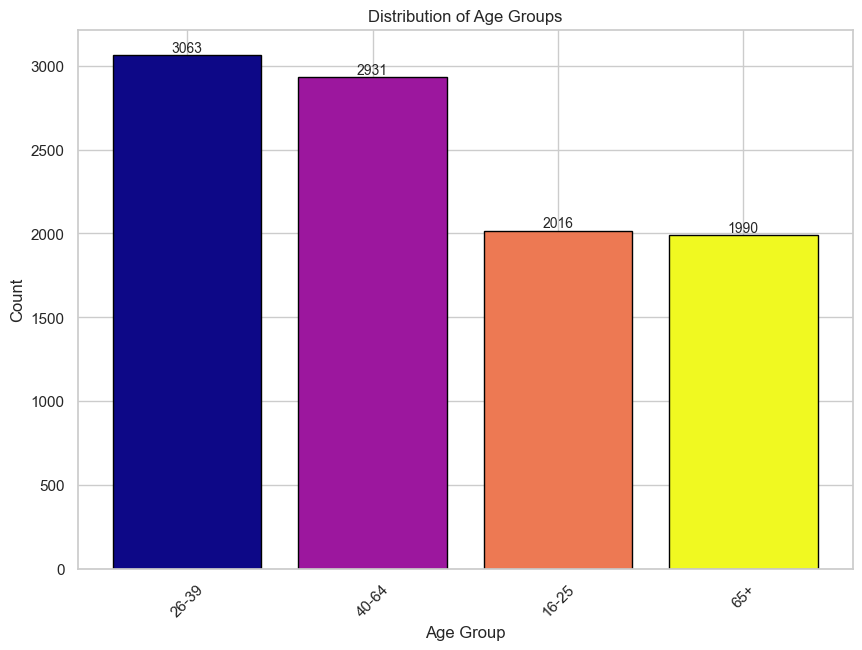

In [23]:
#Define mapping for age values
age_mapping = {0: '16-25', 1: '26-39', 2: '40-64', 3: '65+'}

# Get value counts and map values to labels
value_counts = df['age'].value_counts().rename(index=age_mapping)

# Set Seaborn style for cleaner visuals
sns.set_theme(style='whitegrid')

# Create a color map
num_bars = len(value_counts)
colors = cm.plasma(np.linspace(0, 1, num_bars)) 
# Create the bar plot with custom color and edge
plt.figure(figsize=(10, 7))
bars = plt.bar(value_counts.index, value_counts.values, color=colors, edgecolor='black')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45)
plt.show()

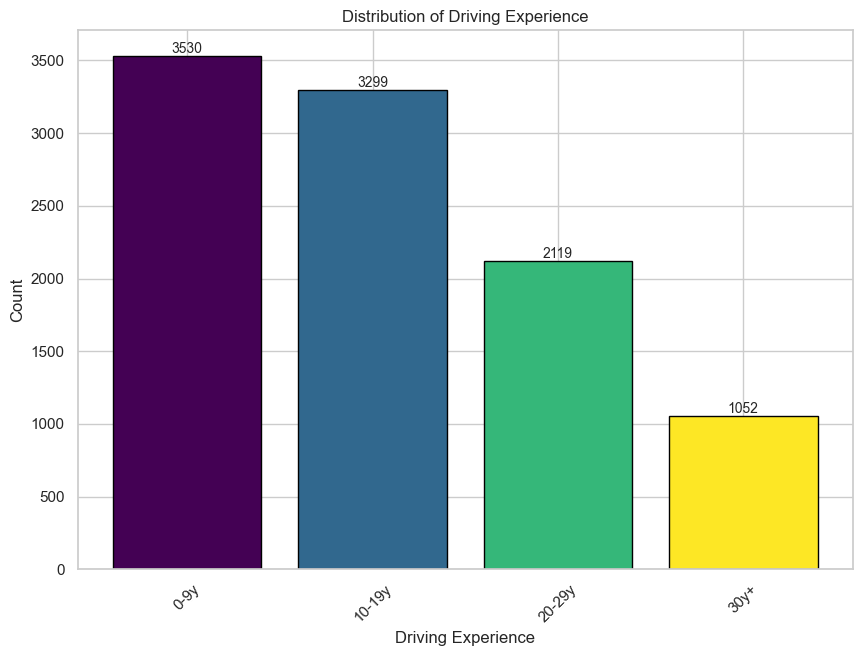

In [24]:
#Define experience mapping
experience_mapping = {0:'0-9y', 1:'10-19y', 2:'20-29y', 3:'30+'}

# Get value counts and map values to labels
value_counts = df['driving_experience'].value_counts().rename(index=experience_mapping)

# Set Seaborn style for cleaner visuals
sns.set_theme(style='whitegrid')

# Create a color map
num_bars = len(value_counts)
colors = cm.viridis(np.linspace(0, 1, num_bars))  # Viridis colormap

# Create the bar plot with custom color and edge
plt.figure(figsize=(10, 7))
bars = plt.bar(value_counts.index, value_counts.values, color=colors, edgecolor='black')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Driving Experience')
plt.ylabel('Count')
plt.title('Distribution of Driving Experience')
plt.xticks(rotation=45)
plt.show()

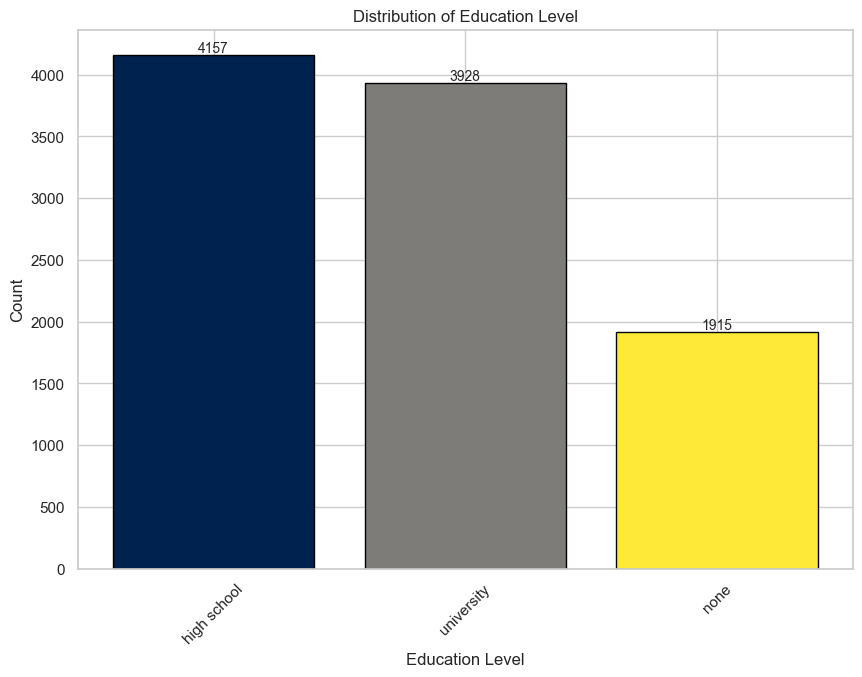

In [25]:
#Define mapping for education
education_mapping = {0: 'None', 1: 'High School', 2: 'University'}

# Get value counts and map values to labels
value_counts = df['education'].value_counts().rename(index=education_mapping)

# Set Seaborn style for cleaner visuals
sns.set_theme(style='whitegrid')

# Create a color map
num_bars = len(value_counts)
colors = cm.cividis(np.linspace(0, 1, num_bars))  

# Create the bar plot with custom color and edge
plt.figure(figsize=(10, 7))
bars = plt.bar(value_counts.index, value_counts.values, color=colors, edgecolor='black')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level')
plt.xticks(rotation=45)
plt.show()

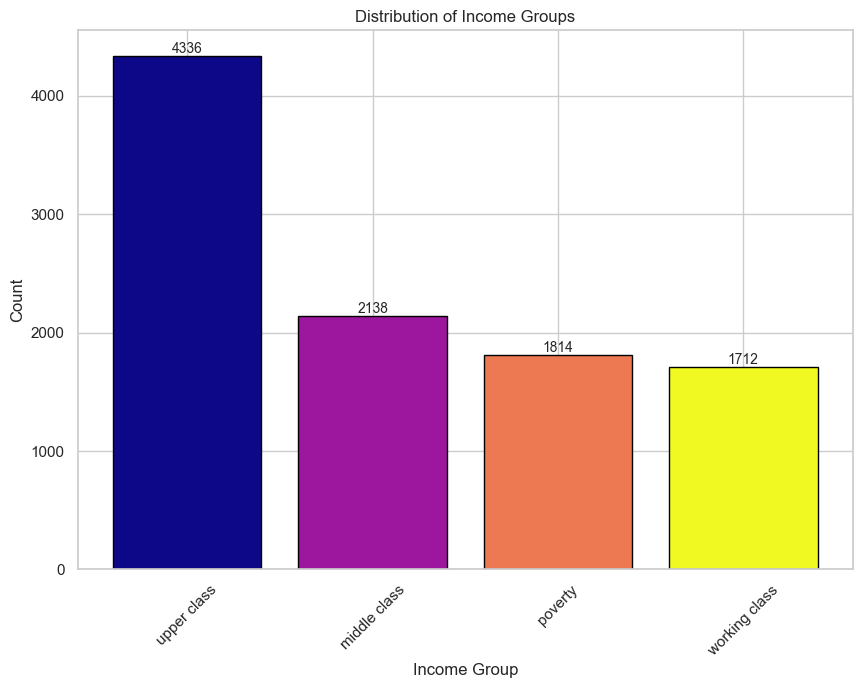

In [26]:
# Get value counts and map values to labels
value_counts = df['income'].value_counts()

# Set Seaborn style for cleaner visuals
sns.set_theme(style='whitegrid')

# Create a color map
num_bars = len(value_counts)
colors = cm.plasma(np.linspace(0, 1, num_bars))  

# Create the bar plot with custom color and edge
plt.figure(figsize=(10, 7))
bars = plt.bar(value_counts.index, value_counts.values, color=colors, edgecolor='black')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Distribution of Income Groups')
plt.xticks(rotation=45)
plt.show()

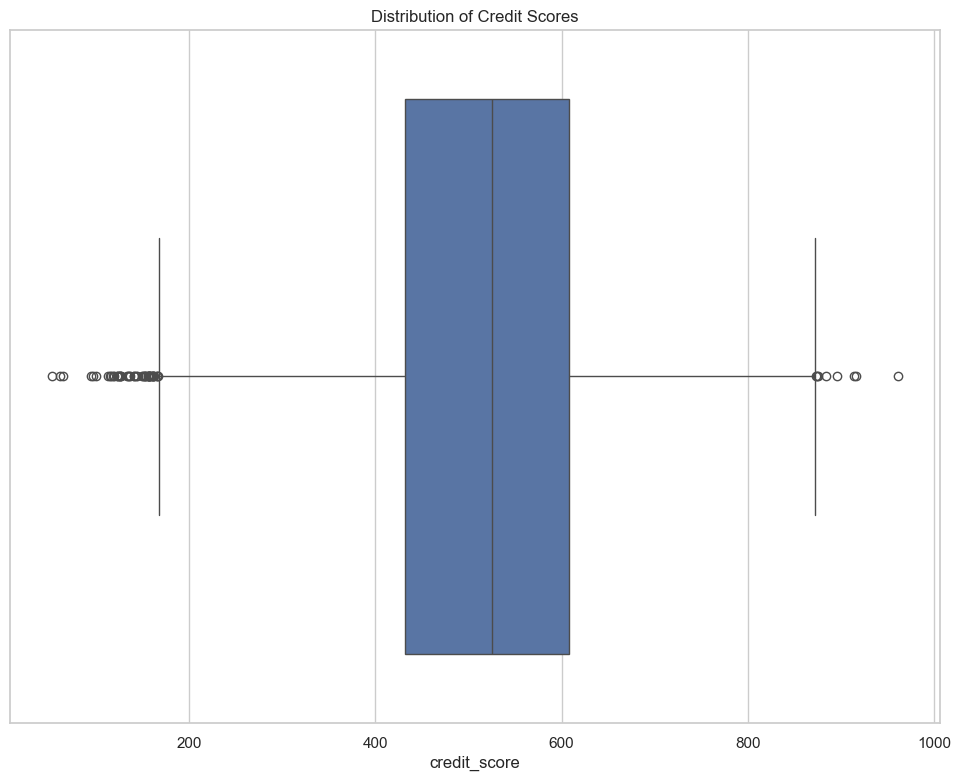

In [27]:
df['credit_score'] = round(df['credit_score'] * 1000, 0)
plt.figure(figsize=(12,9))
sns.boxplot(x=df['credit_score'])
plt.title('Distribution of Credit Scores')
plt.show()


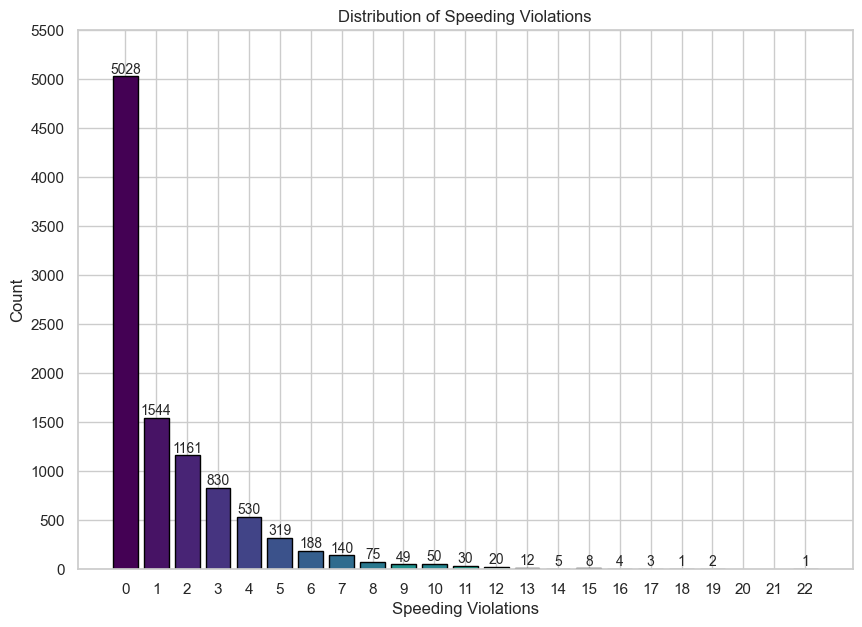

In [36]:
#Visualizig the distibution of speeding violations. 
# Get value counts and map values to labels
speeding_counts = df['speeding_violations'].value_counts()

# Set Seaborn style for cleaner visuals
sns.set_theme(style='whitegrid')

# Create a color map
num_bars = len(speeding_counts)
colors = cm.viridis(np.linspace(0, 1, num_bars))  

# Create the bar plot with custom color and edge
plt.figure(figsize=(10, 7))
bars = plt.bar(speeding_counts.index, speeding_counts.values, color=colors, edgecolor='black')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.xlabel('Speeding Violations')
plt.xticks(np.arange(0,23,1))
plt.ylabel('Count')
plt.yticks(np.arange(0,5501, 500))
plt.title('Distribution of Speeding Violations')
plt.show()


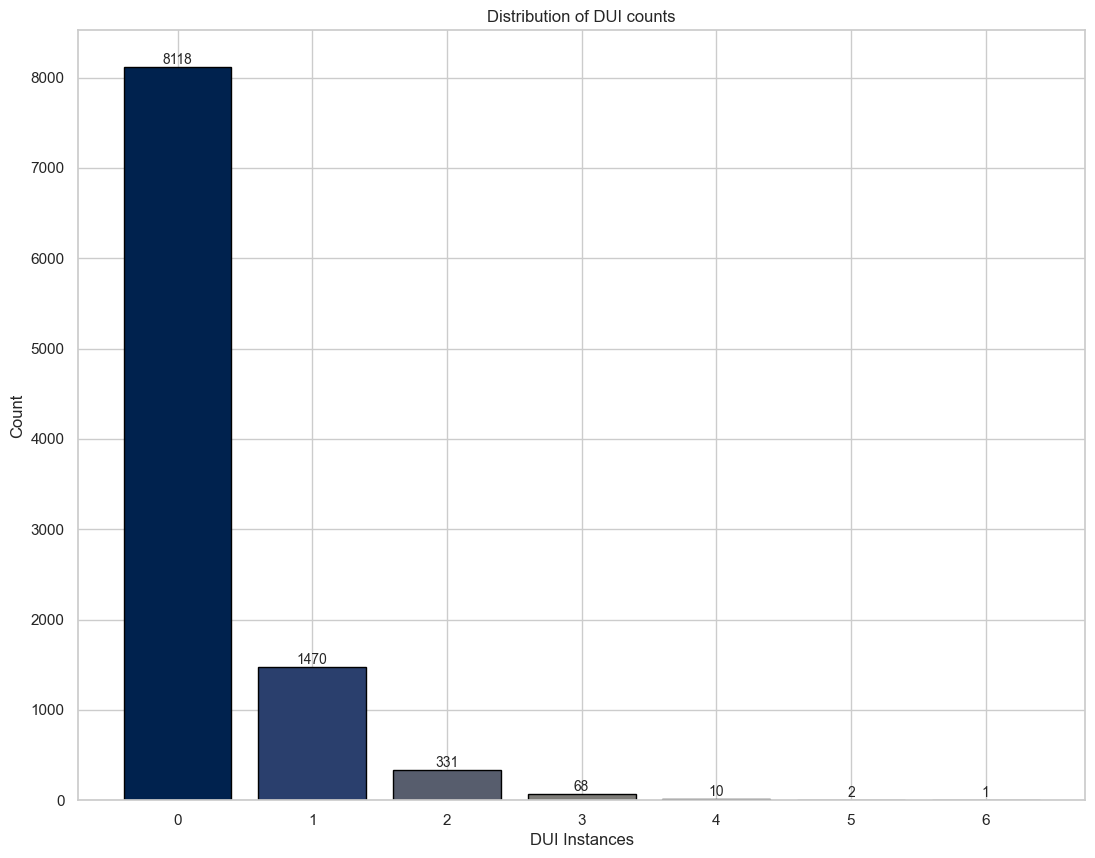

In [38]:
#Visualizing the distribution of past accidents.
#Getting value counts and map values to labels
dui_counts = df['duis'].value_counts()

#Set seaborn style for cleaner visuals 
sns.set_theme(style = 'whitegrid')

#Create a color map 
num_bars = len(dui_counts)
colors = cm.cividis(np.linspace(0, 1, num_bars))

# Create the bar plot with custom color and edge
plt.figure(figsize=(13, 10))
bars = plt.bar(dui_counts.index, dui_counts.values, color=colors, edgecolor='black')

#Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+1, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.xlabel('DUI Instances')
plt.ylabel('Count')
plt.title('Distribution of DUI counts')
plt.show()




Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601906
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616975
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572644
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.598699
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
  

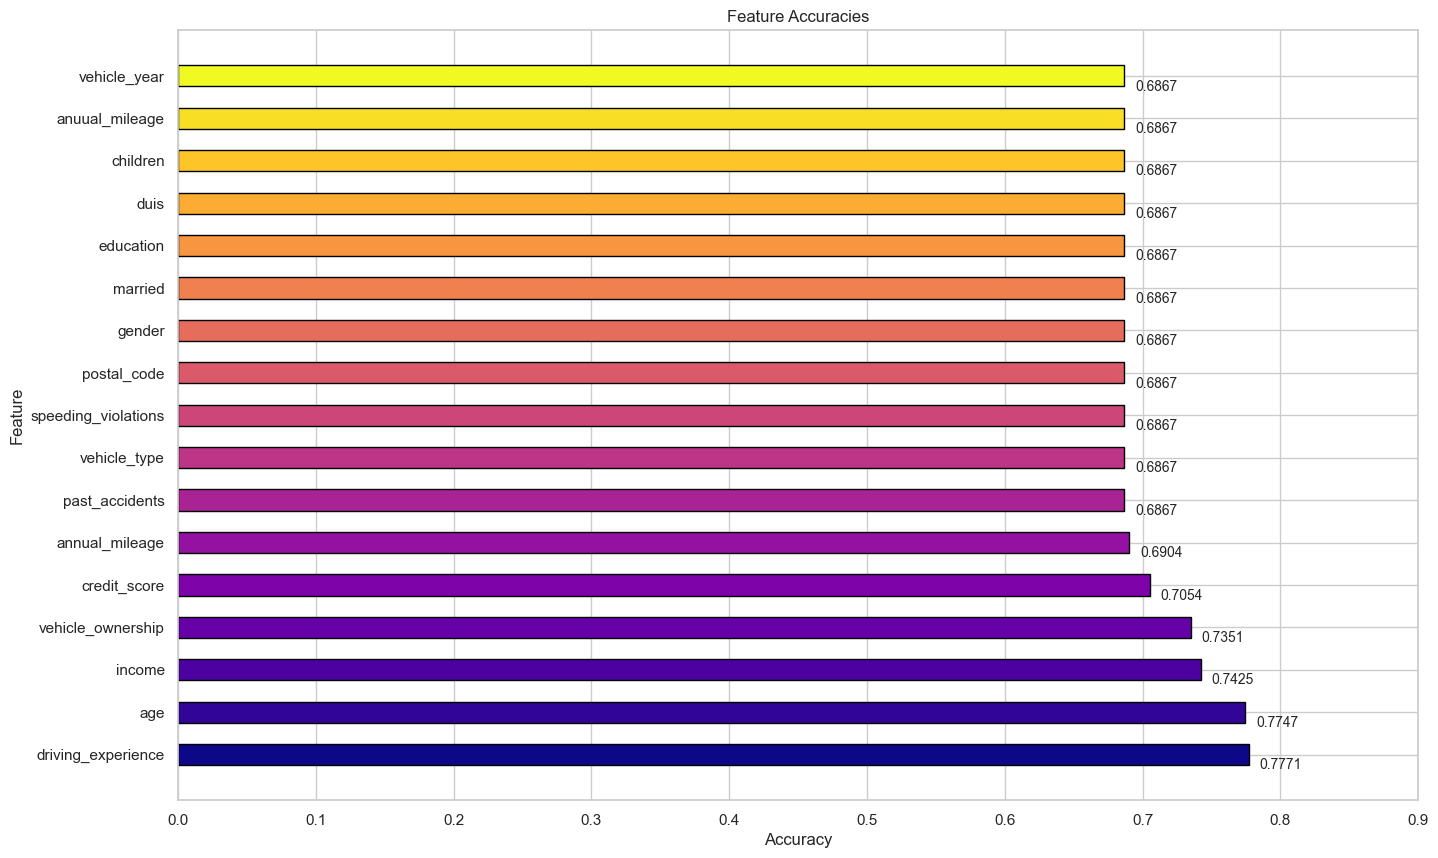

         best_feature  best_accuracy
5  driving_experience         0.7771


In [53]:
#Creating a function to evaluate model accuracy across all the columns except the id and the outcome
def evaluate_column_accuracy(df):
    explanatory_columns = df.columns.difference(['id','outcome'])
    y = df['outcome']
    accuracies = {}
    for col in explanatory_columns:
        try:
            #Fit Logistic regression
            model = logit(f'y ~ {col}', data=df).fit()
            # Create a DataFrame for prediction
            pred_df = df[[col]]
            #Predict
            predict_probs = model.predict(pred_df)
            predictions = (predict_probs >= 0.5).astype(int)
            #Derive accuracy
            accuracy = (predictions == y).mean()
            accuracies[col] = accuracy
        except Exception as e:
            print(f'Error with column{col} : {e}')
            accuracies[col] = 0
        
    return pd.DataFrame(list(accuracies.items()), columns=['Feature','Accuracy']).sort_values(by='Accuracy', ascending=False)

#Examining the results
result_df = evaluate_column_accuracy(df)
print(result_df)

#Visualizng the feature accuracy
#Set seaborn style for better visuals
sns.set_theme(style='whitegrid')

#Create a color map
num_bars = len(result_df)
colors = cm.plasma(np.linspace(0,1,num_bars))

#Create the bar plot with custom color and edge
plt.figure(figsize=(16,10))
bars = plt.barh(
    y=result_df['Feature'].astype(str),
    width=result_df['Accuracy'],
    color=colors,
    edgecolor='black',
    height=0.5
   )
for bar in bars:
    width = bar.get_width()
    plt.text(
        width+(0.01 * max(result_df['Accuracy'])),
        bar.get_y() + bar.get_height()//2,
        f'{width:.4f}', 
        ha='left',
        va='center',
        fontsize=10
        
    )
plt.xlabel('Accuracy')
plt.ylabel('Feature')
plt.xticks(np.arange(0, 1, 0.1))
plt.title('Feature Accuracies')
plt.show()

#Creating best_feature_df 
best_feature_df = result_df.iloc[0:1,0:2].rename(columns={'Feature':'best_feature', 'Accuracy':'best_accuracy'})
print(best_feature_df)